### Plotting eukaryotic-community abundance from metatranscriptomic analysis

In [31]:
import glob
import os
import pandas as pd
import pysam
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
working_dir = '/vortexfs1/omics/env-bio/collaboration/dinoflagellates_METZYME/data/' \
            'metaT_trimmed_reads/fasta_files/paired/mRNA/'

In [35]:
taxonomy_files = glob.glob(working_dir + 'eukaryota_transcripts/*')

In [36]:
short_col_names = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch',
'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore'] + ['taxonomy']

df_1 = pd.read_csv(taxonomy_files[0], sep='\t', names=short_col_names)

#### Interpreting relative community abundance as the fraction of original reads that mapped to a given phylum, super group, etc. relative to the total number of reads. 
In the paper, they use a combination of phylum, supergroup, genus and other taxonomic classifications, depending on what's present and interesting, so we have used the exact same breakdown, as opposed to a straight phylum-only breakdown or other approach.

To do this, we want to use the output of the BWA alignment to get the number of reads that correspond to an individual contig, then sum at the individual levels to get a total number of reads for each classification. Using a similar approach to `TPM_normalization_and_plotting.ipynb`, but we are not normalizing by gene length because we're not looking at individual gene expression.

In [10]:
# Same TSV file generated in metaT_taxonomy.ipynb

taxon_ORFs = 'diamond_output/dino_metzyme_annotated_coassembly_diamond_out_taxonomy.tsv'

df_taxon = pd.read_csv(working_dir+taxon_ORFs, sep='\t', header=0, index_col=0)

In [21]:
df_taxon[df_taxon['Class'].str.contains('myxococcota')]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Strain_name


In [ ]:
Supergroup, Division, Class, Order, Family, Genus_Species

In [30]:
set(df_taxon['Family'])

{'unclassified candidate division WS1',
 'Thermosipho',
 'Marvinbryantia',
 'Desulfobulbus',
 'Halomonas',
 'Microbulbifer',
 'Idiomarina',
 'Agaricomycetes',
 'Citreicella',
 'Alcaligenes',
 'Thauera',
 'Gemella',
 'Adoxophyes_honmai_nucleopolyhedrovirus_Species',
 'Hydrozoa',
 'Microthamniales_X',
 'Barnesiella',
 'Methanolobus',
 'Echinicola',
 'Dethiobacter',
 'Prasinococcales-Clade-B',
 'Magnetospirillum',
 'Tobacco_necrosis_virus_D_Species',
 'Annelida_XX',
 'Dysgonomonas',
 'Tetrahymenidae',
 'Thioalkalimicrobium',
 'Blastopirellula',
 'Calothrix',
 'Methanococcus',
 'Fervidicoccus',
 'Aquifex',
 'Rhodobacteraceae_X',
 'Oxalobacter',
 'Microscilla',
 'Conexibacter',
 'Methanococcoides',
 'Ceratocystis_polonica_partitivirus_Species',
 'Ramlibacter',
 'Frankia',
 'Desulfomicrobium',
 'Deferribacter',
 'Halorhodospira',
 'Thioalkalivibrio',
 'Phenylobacterium',
 'Desulfurivibrio',
 'Digenea',
 'Sideroxydans',
 'Thiorhodococcus',
 'Pyramidobacter',
 'Regiella',
 'Methylosinus',
 'Ep

In [26]:
set(df_taxon['Kingdom'])

{'Acidobacteria',
 'Actinobacteria',
 'Alveolata',
 'Amoebozoa',
 'Apusozoa',
 'Aquificae',
 'Archaeplastida',
 'Armatimonadetes',
 'Bacteroidetes/Chlorobi group',
 'Caldiserica',
 'Chlamydiae',
 'Chlamydiae/Verrucomicrobia group',
 'Chloroflexi',
 'Chrysiogenetes',
 'Crenarchaeota',
 'Cyanobacteria',
 'Deferribacteres',
 'Deinococcus-Thermus',
 'Dictyoglomi',
 'Elusimicrobia',
 'Euryarchaeota',
 'Excavata',
 'Fibrobacteres',
 'Firmicutes',
 'Fusobacteria',
 'Gemmatimonadetes',
 'Hacrobia',
 'Korarchaeota',
 'Lentisphaerae',
 'Nitrospirae',
 'Opisthokonta',
 'Planctomycetes',
 'Proteobacteria',
 'Rhizaria',
 'SAR406',
 'Saccharibacteria',
 'Spirochaetes',
 'Stramenopiles',
 'Synergistetes',
 'TM7',
 'Tenericutes',
 'Thaumarchaeota',
 'Thermodesulfobacteria',
 'Thermotogae',
 'dsDNA viruses, no RNA stage',
 'dsRNA viruses',
 'ssDNA viruses',
 'ssRNA viruses',
 'unclassified Archaea',
 'unclassified Bacteria',
 'unclassified phages',
 'unclassified virophages'}

In [23]:
set(df_taxon['Order'])

{'Acanthamoeba_polyphaga_mimivirus_Genus',
 'Acanthocystis_turfacea_Chlorella_virus_1_Genus',
 'Acanthoecida',
 'Accumulibacter',
 'Acetobacteraceae',
 'Acholeplasmataceae',
 'Acidilobaceae',
 'Acidimicrobiaceae',
 'Acidithiobacillaceae',
 'Acidobacteria_XXX',
 'Acidobacteriaceae',
 'Acidothermaceae',
 'Actinomycetaceae',
 'Actinospicaceae',
 'Adoxophyes_honmai_nucleopolyhedrovirus_Genus',
 'Adoxophyes_orana_granulovirus_Genus',
 'Aerococcaceae',
 'Aeromonadaceae',
 'African_swine_fever_virus_Genus',
 'Agaricomycotina',
 'Agrotis_segetum_granulovirus_Genus',
 'Alcaligenaceae',
 'Alcanivoracaceae',
 'Alicyclobacillaceae',
 'Alphaherpesvirinae',
 'Alphanodavirus',
 'Alteromonadaceae',
 'Alteromonadales_X',
 'Ampelovirus',
 'Anaerolineaceae',
 'Anaplasmataceae',
 'Annelida_X',
 'Anoecales',
 'Apiineae',
 'Aquificaceae',
 'Araceae',
 'Archaea_XXXX',
 'Archaeoglobaceae',
 'Archamoebea-2',
 'Armatimonadetes_XXX',
 'Aurantimonadaceae',
 'Aureusvirus',
 'Autographivirinae',
 'Avenavirus',
 'Av

In [45]:
bam_paths = ['bwa_mem_nucleotide_files/30B8Z_S11_001_40m_mRNA_mapped_sorted.bam',
            'bwa_mem_nucleotide_files/30B90_S12_001_70m_mRNA_mapped_sorted.bam',
            'bwa_mem_nucleotide_files/30B91_S28_001_380m_mRNA_mapped_sorted.bam']

In [159]:
def join_read_counts(df_taxon, bam_path):
    # This function takes in the location of bam files and a dataframe with contig and taxonomy info
    # and returns the same dataframe with read counts added
    samfile = pysam.AlignmentFile(working_dir+path, "rb")
    sample_id = path.split('/')[1].split('_mRNA')[0]

    idx_stats = samfile.get_index_statistics()

    contigs = []
    mapped = []
    unmapped = []

    for contig_stat in idx_stats:
        contigs.append(contig_stat.contig)
        mapped.append(contig_stat.mapped)
        unmapped.append(contig_stat.unmapped)

    ORF_read_counts = pd.DataFrame({'contig': contigs, 'mapped': mapped, 'unmapped': unmapped})

    #Ignore all contigs with no mapping hits
    ORF_read_counts = ORF_read_counts[ORF_read_counts['mapped'] != 0]

    taxon_ORF_reads = ORF_read_counts.join(df_taxon.set_index('qseqid'), on='contig', how='inner')

    return taxon_ORF_reads

In [160]:
abundance_dict = {}

for path in bam_paths:
    
    #Use regex to get the name of the site
    sample_name = re.search('[0-9]{2,3}m', path)[0]
    print(sample_name)
    
    sample_abundance_dict = {}

    for file in taxonomy_files:
        #Get just the name of the classification, which is the very end of the file i.e. .../transcripts_Rhizaria.tsv
        name = re.search('transcripts_.*.tsv', file)[0].split('transcripts_')[1].split('.tsv')[0]
        print(name)
        #Read in data
        taxon_df = pd.read_csv(file, sep='\t', names=short_col_names)
        #Do mapping with original reads
        temp_df = join_read_counts(taxon_df, path)
        #Calculate "abundance" as the sum of total reads mapped to the group
        abundance = temp_df['mapped'].sum()
        #Add to a dictionary
        sample_abundance_dict[name] = abundance
    
    abundance_dict[sample_name] = sample_abundance_dict
    

40m
Rhizaria
fungi
amoebozoa
other_stramenopiles
diatoms
other_eukaryota
dinophyta
haptophyta
Excavata
metazoa
Ciliophora
crytophyta
chlorophyta
380m
Rhizaria
fungi
amoebozoa
other_stramenopiles
diatoms
other_eukaryota
dinophyta
haptophyta
Excavata
metazoa
Ciliophora
crytophyta
chlorophyta
70m
Rhizaria
fungi
amoebozoa
other_stramenopiles
diatoms
other_eukaryota
dinophyta
haptophyta
Excavata
metazoa
Ciliophora
crytophyta
chlorophyta


In [161]:
abundance_df = pd.DataFrame(abundance_dict)

In [162]:
re.search('transcripts_.*.tsv', file)[0].split('transcripts_')[1].split('.tsv')[0]

'chlorophyta'

In [163]:
file

'/vortexfs1/omics/env-bio/collaboration/dinoflagellates_METZYME/data/metaT_trimmed_reads/fasta_files/paired/mRNA/eukaryota_transcripts/transcripts_chlorophyta.tsv'

In [174]:
rel_abundance_df = abundance_df*100/abundance_df.sum()
#Add prefix to identify it as station 9
rel_abundance_df = rel_abundance_df.add_prefix('9_')
rel_abundance_df.index = rel_abundance_df.index.str.capitalize()

Text(0, 0.5, 'Percent')

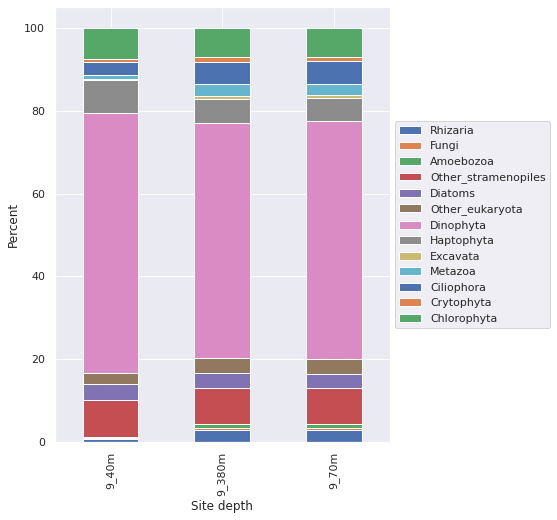

In [175]:
sns.set()

fig, ax = plt.subplots(figsize = (6, 8))
rel_abundance_df.transpose().plot.bar(stacked='True', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Site depth')
plt.ylabel('Percent')